In [2]:
%matplotlib ipympl
import floodzones
import app_state
import matplotlib.pyplot as plt
import osmnx

In [3]:
db = floodzones.FloodDatabase()

In [7]:
db.update_zone((-95.41, 29.71, -95.39, 29.73), floodzones.ZoneDbEntry(time=1,drone_id=1,flooded=True,confidence=0.5))

In [8]:
db.update_zone((-95.415, 29.72, -95.385, 29.725), floodzones.ZoneDbEntry(time=1,drone_id=1,flooded=False,confidence=0.5))

In [9]:
db.update_zone((-95.413, 29.715, -95.40, 29.722), floodzones.ZoneDbEntry(time=1,drone_id=1,flooded=False,confidence=0.5))

In [11]:
db.update_zone((-95.411, 29.72, -95.405, 29.723), floodzones.ZoneDbEntry(time=1,drone_id=1,flooded=True,confidence=0.5))

In [4]:
plt.ioff()

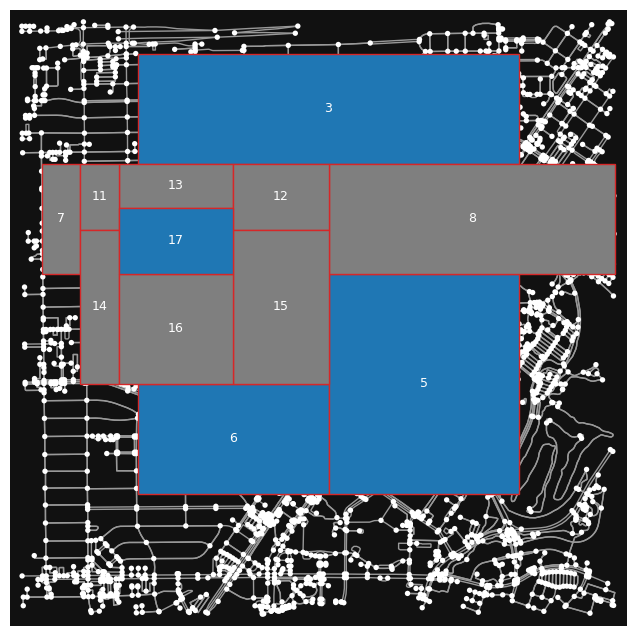

In [12]:
def show():
    mg = app_state._create_map_graph(
        cache_path="./cache/rice_campus.pickle", lat_lon=(29.717997,-95.400547), dist_m=1500
    )
    fig, ax = plt.subplots(figsize=(8, 8))
    osmnx.plot.plot_graph(mg, ax=ax, show=False)
    ax.set_facecolor('#111111')
    db._plot(ax)
    return fig
show()

In [13]:
plt.ion()

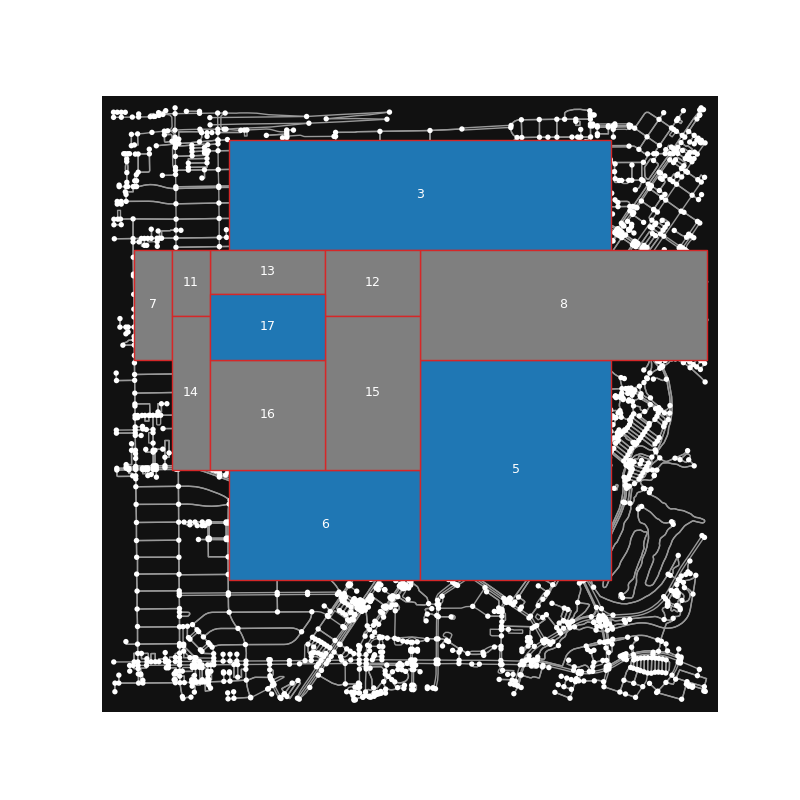

In [14]:
# lines = []
def show():
    mg = app_state._create_map_graph(
        cache_path="./cache/rice_campus.pickle", lat_lon=(29.717997,-95.400547), dist_m=1500
    )
    fig, ax = plt.subplots(figsize=(8, 8))
    osmnx.plot.plot_graph(mg, ax=ax, show=False)
    ax.set_facecolor('#111111')
    db._plot(ax)

    last_clicked = None
    def onclick(event):
        nonlocal last_clicked
        ix, iy = event.xdata, event.ydata
        if last_clicked is None:
            last_clicked = (ix, iy)
        else:
            wet = db.is_path_wet([last_clicked, (ix, iy)])
            ax.plot([last_clicked[0], ix], [last_clicked[1], iy], color="tab:orange" if wet else "tab:green")
            # lines.append([last_clicked, (ix, iy)])
            last_clicked = None
            
    
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    
    return fig
show();